<a href="https://colab.research.google.com/github/haminhtien99/object_detection_using_UAV/blob/main/training%20process/experiment_yolov7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на диск, где я сохранил результаты экспериментов https://drive.google.com/drive/folders/11Nav8hh7rbJAbx6nsNxxyw9oR5VvRbEp

Ссылька на мой репозиторий github
https://github.com/haminhtien99/object_detection_using_UAV

### Описане датасета

VisDrone2019-DET состоит из четырех частей:
- VisDrone2019-DET-train --> train set (6471 imgs)
- VisDrone2019-DET-val --> val set  (548 imgs)
- VisDrone2019-DET-test-dev --> test set (1610 imgs)
- VisDrone2019-DET-test-challenge (есть только изображения, нет аннотаций)

In [ ]:
# инициализация файл .yaml для обучения Yolov7
%cd /content/drive/MyDrive/Nir/yolov7
!rm data/mydataset.yaml
!echo 'train: /content/VisDrone2019-DET/VisDrone2019-DET-train' >> data/mydataset.yaml
!echo 'val: /content/VisDrone2019-DET/VisDrone2019-DET-val' >> data/mydataset.yaml
!echo 'test: /content/VisDrone2019-DET/VisDrone2019-DET-test-dev' >> data/mydataset.yaml
!echo 'nc: 10' >> data/mydataset.yaml
!echo "names: ['pedestrian', 'people', 'bicycle','car', 'van', 'truck', 'tricycle','awning-tricycle','bus', 'motor']" >> data/mydataset.yaml

/content/drive/.shortcut-targets-by-id/1o4xA-t9WL4l57kdtunGUcs2dNgvWDulo/yolov7


### Train yolov7

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Копировать папку VisDrone2019-DET из диска в /content 
# для уменьшения задержки процесса обучения модели 
!cp -r /content/drive/MyDrive/Nir/VisDrone2019-DET /content

Проверёл обучение 8 раз, каждый раз на 10 или 15 эпох. В итоге есть 95 эпох ~ 76000 итераций. Использовать вес last.pt для обучения в следующий раз. Вес best.pt для проверки обнаружения. Файлы train.py, test.py, detect.py из репозитория yolov7(или yolov5) github

In [ ]:
# batchsize = 2 из-за ограничения gpu colab
%cd /content/drive/MyDrive/Nir/yolov7
!python train.py --batch 2 --cfg cfg/training/yolov7.yaml --img 1280 1280 --epochs 50 --data data/mydataset.yaml --weights 'pretrain/yolov7.pt'

Обучение для входного разрешения 1280*1280

In [ ]:
# batchsize = 2 из-за ограничения gpu colab
%cd /content/drive/MyDrive/Nir/yolov7
!python train.py --batch 2 --cfg cfg/training/yolov7.yaml --img 1280 1280 --epochs 50 --data data/mydataset.yaml --weights '/content/drive/MyDrive/Nir/yolov7/runs/train/exp4/weights/last.pt'

/content/drive/.shortcut-targets-by-id/1o4xA-t9WL4l57kdtunGUcs2dNgvWDulo/yolov7
2023-05-04 09:00:03.147383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 09:00:04.069861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-116-g8c0bf3f torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='/content/drive/MyDrive/Nir/yolov7/runs/train/exp4/weights/last.pt', cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=50, batch_size=2, img_size=[1280, 1280], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls

### Detect on test-challenge

С разными разрешениями [320, 416, 640, 1026, 1120, 1280]

In [ ]:
%cd /content/drive/MyDrive/Nir/yolov7
!python mydetect.py --weights runs/train/exp8/weights/best.pt --conf 0.25 --source /content/VisDrone2019-DET/VisDrone2019-DET-test-challenge/images

/content/drive/.shortcut-targets-by-id/1o4xA-t9WL4l57kdtunGUcs2dNgvWDulo/yolov7
Namespace(weights=['runs/train/exp8/weights/best.pt'], source='/content/VisDrone2019-DET/VisDrone2019-DET-test-challenge/images', conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
img_size =  320
YOLOR 🚀 v0.1-116-g8c0bf3f torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36530318 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native

In [ ]:
%cd /content/drive/MyDrive/Nir/yolov7
!python test.py --data data/mydataset.yaml --img 640 --batch 8 --conf 0.001 --iou 0.65 --device 0 --weights /content/drive/MyDrive/Nir/yolov7/runs/train/exp/weights/last.pt

/content/drive/.shortcut-targets-by-id/1o4xA-t9WL4l57kdtunGUcs2dNgvWDulo/yolov7
Namespace(weights=['/content/drive/MyDrive/Nir/yolov7/runs/train/exp/weights/last.pt'], data='data/mydataset.yaml', batch_size=8, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-116-g8c0bf3f torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36530318 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 


Traceback (most recent call last):
  File "/content/drive/.shortcut-targets-by-id/1o4xA-t9WL4l57kdtunGUcs2dNgvWDulo/yolov7/test.py", line 319, in <module>
    test(opt.data,
  File 

## Результаты

Поскольку результаты каждый раз сохраняются в отдельном файле results.txt, все файлы results.txt должны считываться и записываться в один файл results.txt.

### mAP, F1_score в процессе обучения

In [ ]:
%cd /content/drive/MyDrive/Nir/yolov7/runs/train
path_dir = '/content/drive/MyDrive/Nir/yolov7/runs/train' #  path_dir + dir = full path 
list = ['exp', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6', 'exp7', 'exp8']

list_full_path = []
for dir in list:
    full_path = path_dir + '/'  + dir
    list_full_path.append(full_path)


target_file = path_dir + '/results.txt'

for folder in list_full_path:
    source_file = folder + '/results.txt' 

    
    with open(source_file,'r') as f1:
        content = f1.read()
    with open(target_file, 'a') as f2:
        f2.write(content + "\n")
    print(source_file)

/content/drive/.shortcut-targets-by-id/1o4xA-t9WL4l57kdtunGUcs2dNgvWDulo/yolov7/runs/train
/content/drive/MyDrive/Nir/yolov7/runs/train/exp/results.txt
/content/drive/MyDrive/Nir/yolov7/runs/train/exp2/results.txt
/content/drive/MyDrive/Nir/yolov7/runs/train/exp3/results.txt
/content/drive/MyDrive/Nir/yolov7/runs/train/exp4/results.txt
/content/drive/MyDrive/Nir/yolov7/runs/train/exp5/results.txt
/content/drive/MyDrive/Nir/yolov7/runs/train/exp6/results.txt
/content/drive/MyDrive/Nir/yolov7/runs/train/exp7/results.txt
/content/drive/MyDrive/Nir/yolov7/runs/train/exp8/results.txt


In [ ]:
r = open(target_file, 'r')
lines = r.readlines()
precision = []
precision.append(0)
recall = []
recall.append(0)

mAP_1 = [] #По умолчанию: mAP при IoU= 0.65
mAP_1.append(0)
mAP_2 = [] #mAP при всех IoU из torch.linspace(0.5, 0.95, 10)
mAP_2.append(0)

for line in lines:
    if line != '\n':
        line = line.split()
        precision.append(float(line[8]))
        recall.append(float(line[9]))
        mAP_1.append(float(line[10]))
        mAP_2.append(float(line[11]))
F1 = []
F1.append(0)
for i, P in enumerate(precision):
    R = recall[i]
    if i >0:
        F1.append(2*P*R/(P+R))
epochs = np.arange(0, len(recall))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

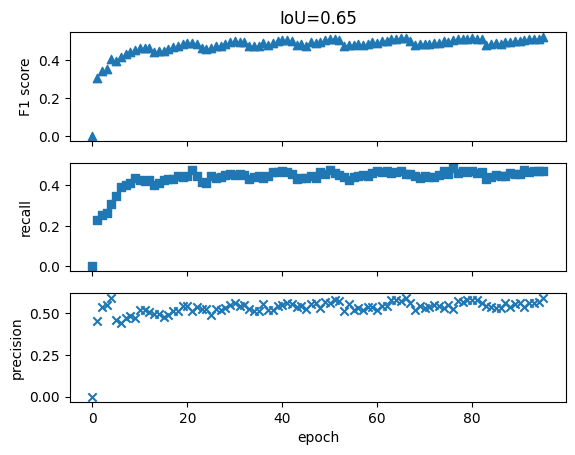

In [ ]:
fig, axs = plt.subplots(3, 1)

axs[0].scatter(epochs, F1,marker ='^')
axs.flat[0].set(ylabel ='F1 score')
axs[0].title.set_text('IoU=0.65')
axs[1].scatter(epochs, recall,marker ='s')
axs.flat[1].set(ylabel ='recall')

axs[2].scatter(epochs, precision,marker ='x')
axs.flat[2].set(ylabel ='precision')


for ax in axs.flat:
    ax.set(xlabel='epoch')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

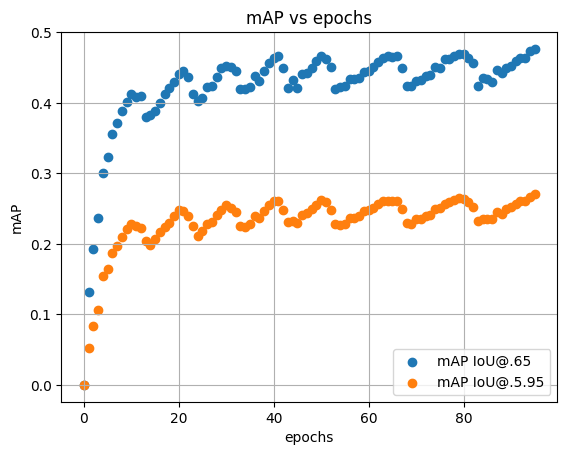

In [ ]:

plt.scatter(epochs, mAP_1,  label="mAP IoU@.65")
plt.scatter(epochs, mAP_2, label="mAP IoU@.5.95")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("mAP")
plt.title("mAP vs epochs")
plt.grid(True)
plt.show()

### FPS , Inference

In [ ]:
%cd /content/drive/MyDrive/Nir/yolov7/runs/detect
path_dir = '/content/drive/MyDrive/Nir/yolov7/runs/detect'

target_file = path_dir + '/results.txt'
Inference = []
FPS = []
resolution = []
r = open(target_file, 'r')
lines = r.readlines()

for line in lines:
    if line != '\n':
        line = line.split()
        resolution.append(line[0])
        Inference.append(round(float(line[1]), 2))
        FPS.append(int(1000 / float(line[1])))

/content/drive/.shortcut-targets-by-id/1o4xA-t9WL4l57kdtunGUcs2dNgvWDulo/yolov7/runs/detect


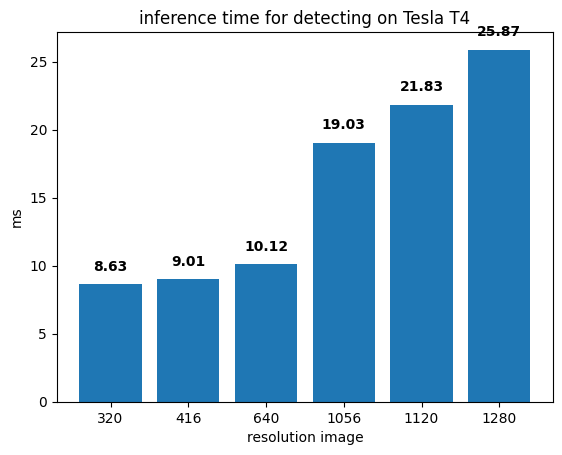

In [ ]:

plt.bar(resolution, Inference)
plt.xlabel("resolution image")
plt.title("inference time for detecting on Tesla T4")
plt.ylabel("ms")
for i, v in enumerate(Inference):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.show()

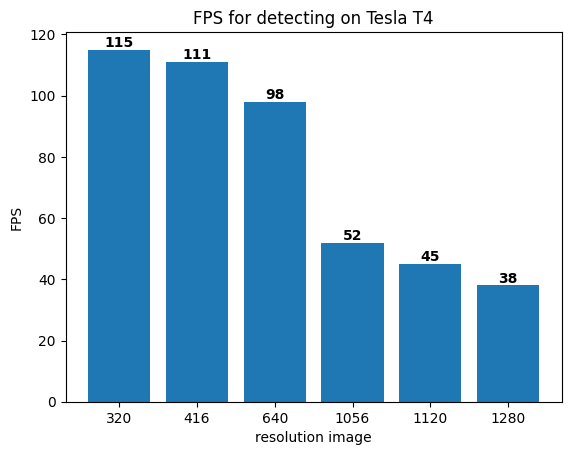

In [ ]:
plt.bar(resolution, FPS)
plt.xlabel("resolution image")
plt.title("FPS for detecting on Tesla T4")
for i, v in enumerate(FPS):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.ylabel("FPS")
plt.show()